<a href="https://colab.research.google.com/github/Medissaoui07/Machine-Learning-Projects/blob/main/Rain_Prediction_Using_Descision_Trees_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Rain Prediction using Desicision Trees and Random Forest **

In [ ]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [ ]:
!pip install opendatasets scikit-learn  jovian --quiet --upgrade

In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .
We will use the opendatasets library to download the data from Kaggle directly within Jupyter.

In [ ]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
os.listdir('weather-dataset-rattle-package')


['weatherAUS.csv']

In [ ]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')


In [ ]:
raw_df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Let's check the column types of the dataset

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.shape


(145460, 23)

Let's drop any rows where the value of the target column RainTomorrow in empty.



In [ ]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)

In [ ]:
raw_df.shape

(142193, 23)

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Training, Validation and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)

In [ ]:
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', valid_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (91003, 23)
val_df.shape : (22751, 23)
test_df.shape : (28439, 23)


### Input and Target Columns

Let's identify the input and target columns.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
train_inputs= train_df[input_cols].copy()
train_targets= train_df[target_col].copy()

In [ ]:
valid_inputs= valid_df[input_cols].copy()
valid_targets= valid_df[target_col].copy()

In [ ]:
test_inputs= test_df[input_cols].copy()
test_targets= test_df[target_col].copy()

Let's also identify the numeric and categorical columns.

In [ ]:
num_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()

In [ ]:
cat_cols=train_inputs.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Imputing missing numeric values

In [ ]:
train_inputs.isna().sum()

Location             0
MinTemp            426
MaxTemp            209
Rainfall           955
Evaporation      38979
Sunshine         43405
WindGustDir       5988
WindGustSpeed     5946
WindDir9am        6419
WindDir3pm        2427
WindSpeed9am       869
WindSpeed3pm      1685
Humidity9am       1143
Humidity3pm       2338
Pressure9am       8992
Pressure3pm       8968
Cloud9am         34405
Cloud3pm         36534
Temp9am            599
Temp3pm           1776
RainToday          955
dtype: int64

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(raw_df[num_cols])

SimpleImputer()

In [ ]:
train_inputs[num_cols] = imputer.transform(train_inputs[num_cols])
valid_inputs[num_cols] = imputer.transform(valid_inputs[num_cols])
test_inputs[num_cols] = imputer.transform(test_inputs[num_cols])

In [ ]:
train_inputs[num_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_inputs[num_cols])

MinMaxScaler()

In [ ]:
train_inputs[num_cols]=scaler.transform(train_inputs[num_cols])
valid_inputs[num_cols]=scaler.transform(valid_inputs[num_cols])
test_inputs[num_cols]=scaler.transform(test_inputs[num_cols])

### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import  OneHotEncoder

In [ ]:
encoder= OneHotEncoder(handle_unknown='ignore')
encoder.fit(raw_df[cat_cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [ ]:
# Handle unknown categories during transformation
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols]).toarray()
valid_inputs[encoded_cols] = encoder.transform(valid_inputs[cat_cols]).toarray()
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols]).toarray()

<ipython-input-37-98037cc8e24e>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols]).toarray()
<ipython-input-37-98037cc8e24e>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols]).toarray()
<ipython-input-37-98037cc8e24e>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

In [ ]:
test_inputs.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
57760,Ballarat,0.367925,0.344961,0.02372,0.037723,0.533207,N,0.271318,N,WNW,0.184615,0.252874,1.00,0.98,0.333898,0.451078,1.000000,0.888889,0.341991,0.328155,Yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
127128,Walpole,0.511792,0.447674,0.00000,0.037723,0.533207,E,0.325581,ESE,ESE,0.184615,0.229885,0.73,0.73,0.772881,0.756219,0.554649,0.500352,0.463203,0.434951,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
119994,PerthAirport,0.417453,0.532946,0.00000,0.034483,0.776224,ENE,0.356589,ENE,ESE,0.200000,0.229885,0.45,0.25,0.815254,0.791045,0.000000,0.000000,0.482684,0.541748,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7088,Cobar,0.561321,0.598837,0.00000,0.071724,0.533207,E,0.294574,E,NE,0.184615,0.218391,0.48,0.40,0.528814,0.524046,0.875000,0.777778,0.534632,0.576699,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
x_train=train_inputs[num_cols+encoded_cols]
x_valid=valid_inputs[num_cols+encoded_cols]
x_test=test_inputs[num_cols+encoded_cols]

In [ ]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
33760,0.535377,0.616279,0.000539,0.063448,0.363636,0.527132,0.200000,0.344828,0.43,0.50,0.440678,0.330017,0.875000,0.555556,0.543290,0.543689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
133305,0.278302,0.381783,0.000000,0.037723,0.533207,0.255814,0.130769,0.252874,0.61,0.44,0.550847,0.615257,0.554649,0.500352,0.359307,0.372816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
138142,0.742925,0.775194,0.000000,0.093793,0.146853,0.286822,0.015385,0.275862,0.20,0.13,0.508475,0.500829,0.875000,0.777778,0.755411,0.751456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
58445,0.332547,0.560078,0.000000,0.017931,0.533207,0.387597,0.115385,0.275862,0.53,0.19,0.552542,0.519071,0.625000,0.222222,0.430736,0.563107,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Training and Visualizing Decision Trees



In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model= DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(x_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.tree import plot_tree , export_text

[Text(0.5, 0.875, 'x[9] <= 0.755\ngini = 0.348\nsamples = 91003\nvalue = [70608, 20395]'),
 Text(0.25, 0.625, 'x[9] <= 0.512\ngini = 0.266\nsamples = 79675\nvalue = [67118, 12557]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 0.528\ngini = 0.145\nsamples = 43701\nvalue = [40259, 3442]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[5] <= 0.318\ngini = 0.378\nsamples = 35974\nvalue = [26859, 9115]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[9] <= 0.825\ngini = 0.426\nsamples = 11328\nvalue = [3490, 7838]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 0.279\ngini = 0.499\nsamples = 4567\nvalue = [2169, 2398]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[11] <= 0.609\ngini = 0.314\nsamples = 6761\nvalue = [1321, 5440]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (.

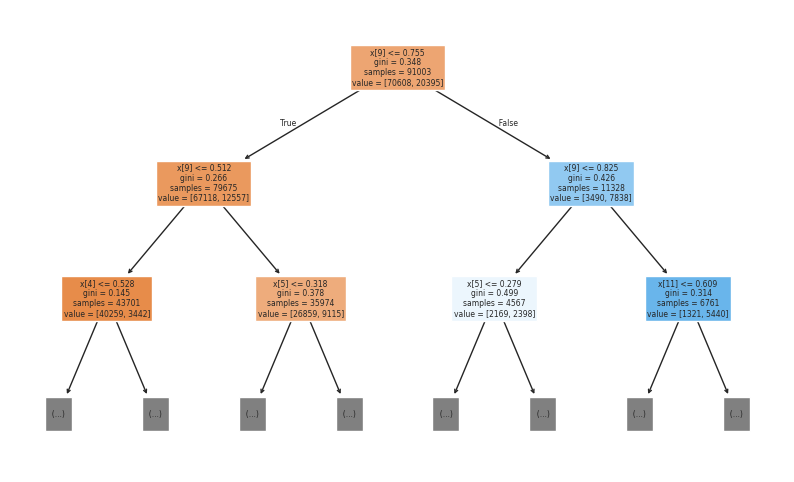

In [ ]:
plot_tree(model,max_depth=2,filled=True)

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
train_preds=model.predict(x_train)
accuracy_score(train_targets,train_preds)

0.9999670340538224

In [ ]:
model.score(x_valid,valid_targets)

0.7884928135027032

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No".


## Hyperparameter Tuning and Overfitting


In [ ]:
def max_depth_error(i):
  model=DecisionTreeClassifier(random_state=42,max_depth=i)
  model.fit(x_train,train_targets)
  train_acc=model.score(x_train,train_targets)
  valid_acc=model.score(x_valid,valid_targets)
  return {"max depth=" , i , "train_acc=" , train_acc , "valid_acc=" , valid_acc}

In [ ]:
errors= [max_depth_error(i) for i in range(1,20)]

In [ ]:
errors_df=pd.DataFrame(errors)

In [ ]:
errors_df

,0,1,2,3,4,5
0,0.823665,1.000000,0.819437,valid_acc=,train_acc=,max depth=
1,0.823665,0.819437,2,valid_acc=,train_acc=,max depth=
2,0.827885,0.825151,3,valid_acc=,train_acc=,max depth=
3,0.835060,0.829942,4,valid_acc=,train_acc=,max depth=
4,0.838148,0.830645,5,valid_acc=,train_acc=,max depth=
5,0.843104,0.832667,6,valid_acc=,train_acc=,max depth=
6,0.847357,0.835743,7,valid_acc=,train_acc=,max depth=
7,0.852192,0.837634,8,valid_acc=,train_acc=,max depth=
8,0.859202,0.837590,9,valid_acc=,train_acc=,max depth=
9,0.866642,0.837106,10,valid_acc=,train_acc=,max depth=


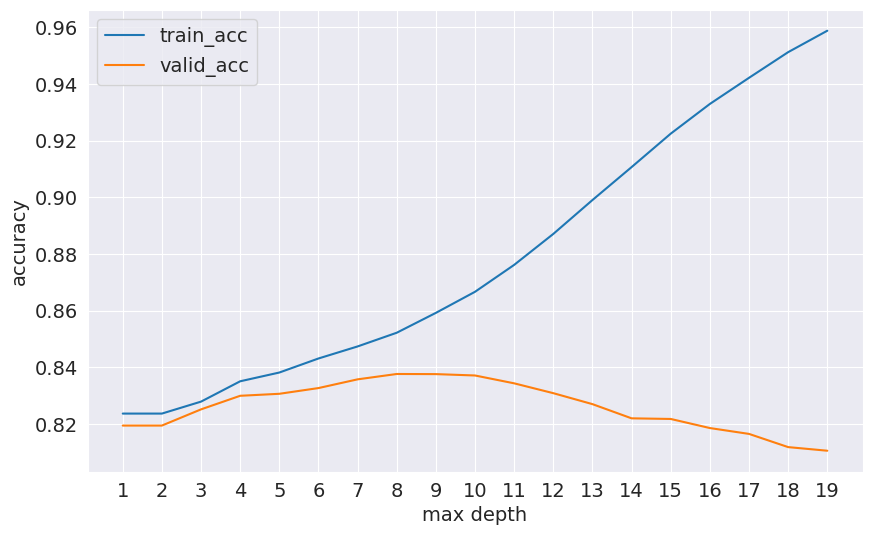

In [ ]:
def max_depth_error(i):
  model=DecisionTreeClassifier(random_state=42,max_depth=i)
  model.fit(x_train,train_targets)
  train_acc=model.score(x_train,train_targets)
  valid_acc=model.score(x_valid,valid_targets)
  return {'max depth': i , 'train_acc': train_acc , 'valid_acc': valid_acc} # Return a dictionary instead of a tuple

errors= [max_depth_error(i) for i in range(1,20)]
errors_df=pd.DataFrame(errors) # Now the DataFrame will have the correct column names

plt.figure()
plt.plot(errors_df['max depth'], errors_df['train_acc'])
plt.plot(errors_df['max depth'], errors_df['valid_acc'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks(range(1,20))
plt.legend(['train_acc','valid_acc'])
plt.show()

In [ ]:
max_depth_error(7)

{'max depth': 7,
 'train_acc': 0.8473566805489929,
 'valid_acc': 0.8357434838029097}

## Training a Random Forest


In [ ]:
model2=RandomForestClassifier(random_state=42)

In [ ]:
model2.fit(x_train,train_targets)

RandomForestClassifier(random_state=42)

In [ ]:
model2.score(x_train,train_targets)

0.9999560454050965

In [ ]:
model2.score(x_valid,valid_targets)

0.8547316601468067

Once again, the training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far.


## Hyperparameter Tuning with Random Forests



### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.

In [ ]:
len(model2.estimators_)

100

In [ ]:
def n_estimators_error(i):
  model=RandomForestClassifier(random_state=42,n_estimators=i)
  model.fit(x_train,train_targets)
  train_acc=model.score(x_train,train_targets)
  valid_acc=model.score(x_valid,valid_targets)
  return {'n_estimator': i , 'train_acc': train_acc , 'valid_acc': valid_acc}



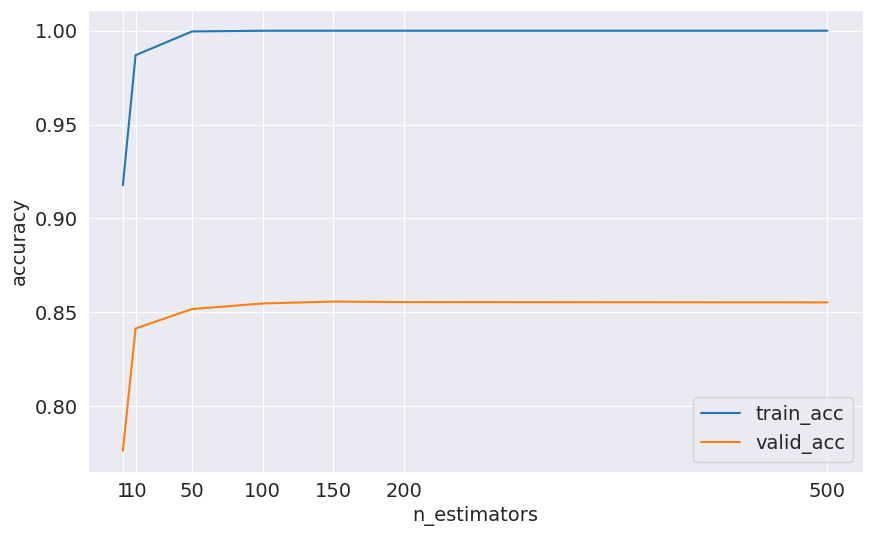

In [ ]:
n_estimators_list = [1, 10, 50, 100, 150, 200, 500]  # Store the values of i
accuracies = []
for i in n_estimators_list:
  accuracies.append(n_estimators_error(i))

df = pd.DataFrame(accuracies)
df['n_estimators'] = n_estimators_list  # Add a column for n_estimators

plt.figure()
plt.plot(df['n_estimators'], df['train_acc'])
plt.plot(df['n_estimators'], df['valid_acc'])
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(n_estimators_list)  # Set x-ticks to the values in n_estimators_list
plt.legend(['train_acc', 'valid_acc'])
plt.show()

### `max_depth`
. You can specify a `max_depth` to reduce overfitting.



In [ ]:
def max_depth_accuracy(i):
  model=RandomForestClassifier(random_state=42,max_depth=i)
  model.fit(x_train,train_targets)
  train_acc=model.score(x_train,train_targets)
  valid_acc=model.score(x_valid,valid_targets)
  return {'max depth': i , 'train_acc': train_acc , 'valid_acc': valid_acc}


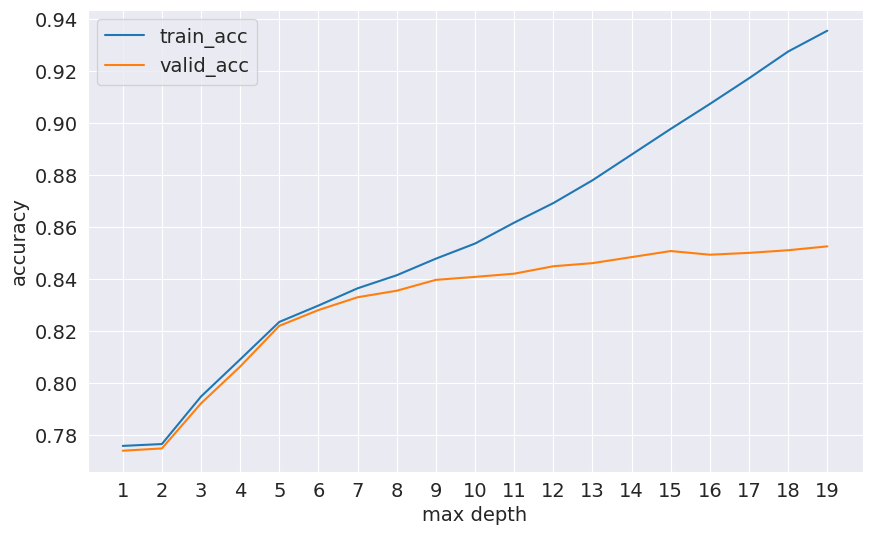

In [ ]:
accuracies = (max_depth_accuracy(i) for i in range(1,20))
df=pd.DataFrame(accuracies)
plt0=plt.figure()
plt.plot(df['max depth'],df['train_acc'])
plt.plot(df['max depth'],df['valid_acc'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks(range(1,20))
plt.legend(['train_acc','valid_acc'])
plt.show()


### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings.

In [ ]:
tuned_model=RandomForestClassifier(random_state=42,max_depth=15,n_estimators=100)

In [ ]:
tuned_model.fit(x_train,train_targets)

RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
tuned_model.score(x_train,train_targets)

0.8977286463083635

In [ ]:
tuned_model.score(x_valid,valid_targets)

0.8507757900751616

## Making Predictions on New Inputs

Let's define a helper function to make predictions on new inputs.

In [ ]:
def predict_input(model, input_data):
  input_df = pd.DataFrame([input_data]) # Create DataFrame from input dictionary
  input_df[num_cols] = imputer.transform(input_df[num_cols])
  input_df[num_cols] = scaler.transform(input_df[num_cols])
  input_df[encoded_cols] = encoder.transform(input_df[cat_cols]).toarray()
  x_inputs = input_df[num_cols + encoded_cols] # Select the features to use for prediction
  pred = model.predict(x_inputs)[0] # Pass the processed DataFrame to predict
  prob = model.predict_proba(x_inputs)[0][list(model.classes_).index(pred)]
  return pred, prob

In [ ]:
new_input = {'Date': '2024-06-19',
             'Location': 'Launceston',
             'MinTemp': 16.4,
             'MaxTemp': 18.0,
             'Rainfall': 12.2,
             'Evaporation': 3.1,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 70.3,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 18.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 10.0,
             'Cloud3pm': 7.0,
             'Temp9am': 16.4,
             'Temp3pm': 20.5,
             'RainToday': 'No'}

In [ ]:
predict_input(tuned_model, new_input)

<ipython-input-109-d5f18e633cf2>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[cat_cols]).toarray()
<ipython-input-109-d5f18e633cf2>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[cat_cols]).toarray()
<ipython-input-109-d5f18e633cf2>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

('Yes', 0.6007868049631204)